# K-mean clustering

Clustering techniques are unsupervised learning algorithms that try to group unlabelled data into "clusters", using the (typically spatial) structure of the data itself.

In [1]:
%matplotlib inline
import math, operator
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

## Create data

The easiest way to demonstrate how clustering works is to simply generate some data and show them in action.

In [4]:
n_clusters = 6
n_samples = 250

To generate our data, we're going to pick 6 random points, which we'll call centroids, and for each point we're going to generate 250 random points about it.

In statistical parlance, we're going to simulate 1500 realizations from 6 different bivariate normal distributions (250 each) with random centroids over the range -35, 35.

In [16]:
centroids = np.random.uniform(-35, 35, (n_clusters, 2)) #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.uniform.html

In [17]:
slices = [np.random.multivariate_normal(centroids[i], np.diag([5.,5.]), n_samples) for i in range(n_clusters)] #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.multivariate_normal.html
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.diag.html

In [18]:
data = np.concatenate(slices).astype(np.float32) #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
#https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [19]:
centroids

array([[ 27.80356197,  16.04572221],
       [-25.68850577,   8.87683048],
       [-15.18900911,   8.9122626 ],
       [-20.65525803, -34.93425595],
       [  7.3809104 ,  -0.18161147],
       [ -0.08695491, -15.43066681]])

In [23]:
len(slices), len(slices[0])

(6, 250)

In [28]:
data.shape, data[0:6]

((1500, 2), array([[ 23.95028114,  13.50576973],
        [ 26.83008575,  16.09581184],
        [ 24.98122215,  18.18497467],
        [ 30.50226021,  21.32608795],
        [ 27.82144928,  18.69265747],
        [ 27.07014465,  14.80398464]], dtype=float32))

Below we can see each centroid marked w/ X, and the coloring associated to each respective cluster.

In [29]:
def plot_data(centroids, data, n_samples):
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids))) #https://matplotlib.org/examples/color/colormaps_reference.html
    #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        plt.scatter(samples[:,0], samples[:,1], c=colour[i], s=1) 
        #https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
        plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=5)
        #https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
        plt.plot(centroid[0], centroid[1], markersize=5, marker="x", color='m', mew=2)

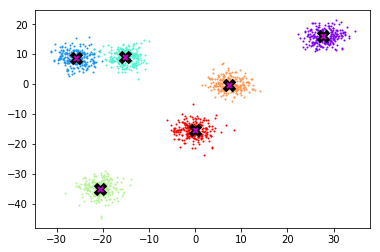

In [30]:
plot_data(centroids, data, n_samples)

In [31]:
import Kmeans_class_module as Kmeans